In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/RicardoASantos1234/DataSets/main/Advertising-2.csv'
df = pd.read_csv(url)

df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df_radio = df[['Radio', 'Sales']]
df_radio.head()

,Radio,Sales
0,37.8,22.1
1,39.3,10.4
2,45.9,9.3
3,41.3,18.5
4,10.8,12.9


In [5]:
df_radio.describe()

,Radio,Sales
count,200.000000,200.000000
mean,23.264000,14.022500
std,14.846809,5.217457
min,0.000000,1.600000
25%,9.975000,10.375000
50%,22.900000,12.900000
75%,36.525000,17.400000
max,49.600000,27.000000


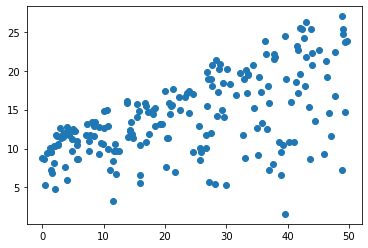

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df_radio.Radio, df_radio.Sales)

In [8]:
def predicted_sales(radio, weight, bias):
    predicted_sales = weight * radio + bias 
    return predicted_sales

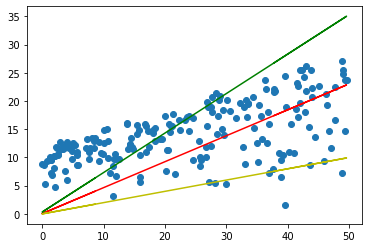

In [10]:
#claims made by people
w1, b1 = [.46, .0249]
w2, b2 = [.7, .3]
w3, b3 = [.2, -.03]
plt.scatter(df_radio.Radio, df_radio.Sales)
y1 = predicted_sales(df_radio.Radio, w1, b1)
y2 = predicted_sales(df_radio.Radio, w2, b2)
y3 = predicted_sales(df_radio.Radio, w3, b3)
plt.plot(df_radio.Radio, y1, c = 'r')
plt.plot(df_radio.Radio, y2, c = 'g')
plt.plot(df_radio.Radio, y3, c = 'y')

In [11]:
def cost_function(true, predicted):
    #sk learn doesnt allow you to modify the cost function
    #you can penalize the machine for going negative by quadrupuling the result instead of to the power of 2
    error = sum((true - predicted)**2)/len(true)
    return error

In [12]:
print(cost_function(df_radio.Sales, y1))
print(cost_function(df_radio.Sales, y2))
print(cost_function(df_radio.Sales, y3))

43.50020310200002
78.94315699999997
106.44812399999996


In [13]:
#we want to do the training ourselves
#gradient descent
#this function has step 2 and 3 of gradient descent inside
# you need old w and b and the features and the true values
def update_weights(features, true, w_old, b_old, learning_rate):
    deriv_w = sum((true-(w_old*features+b_old))*features)*-2/len(features)
    deriv_b = sum(true-(w_old*features+b_old))*-2/len(features)
    w_new = w_old - learning_rate* deriv_w
    b_new = b_old - learning_rate* deriv_b
    return w_new, b_new
    
    

In [16]:
#now we are going to do the training
#do step 1 and step 4 and thats the whole training process
# the w and b are my initial guess in this function
# num of iterations is how you tell the model to stop
from time import sleep
def train(true, features, w, b, learning_rate, iters):
    #create a list to capture the cost history
    cost_history = []
    ### plotting purposes ####
    fig = plt.figure()
    ax = plt.subplot(111)
    fig.canvas.draw()
    for i in range(iters):
        w,b = update_weights(features, true, w, b, learning_rate)
        pred = predicted_sales(features, w, b)
        cost = cost_function(true, pred)
        cost_history.append(cost)
        # logging progress
        if i % 20 == 0:
            print("iter: "+ str(i) + " cost: "+str(cost))
            ### for demo purposes ######
            ax.clear()
            ax.scatter(df.Radio, df.Sales)
            ax.plot(df.Radio, pred, c= 'r')
            fig.canvas.draw()
            sleep(0.5)
            ###########
        
    return w, b, cost_history
        
    
#every 20 iterations it will plot the model and sleep for .5 seconds and print out the cost    
    
    

<IPython.core.display.Javascript object>


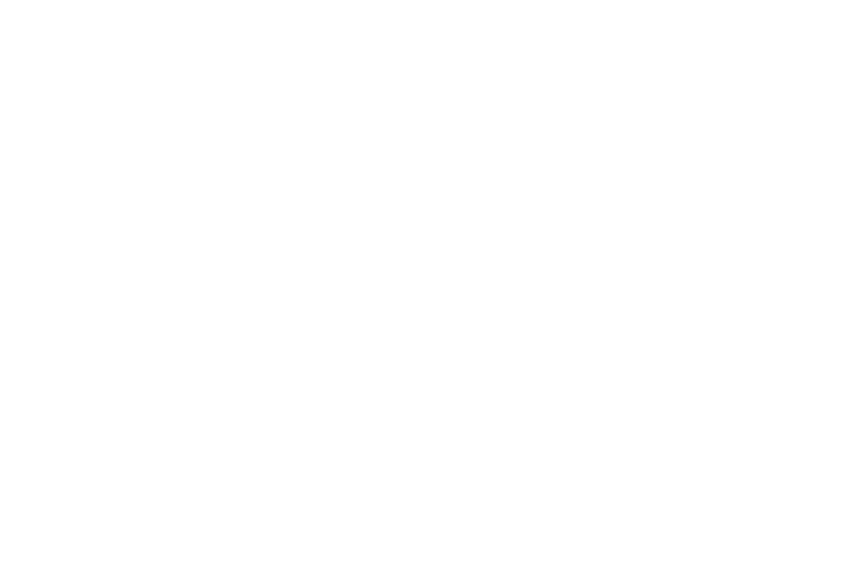

iter: 0 cost: 86.42891391634146
iter: 20 cost: 42.4204664257945
iter: 40 cost: 41.8659846398011
iter: 60 cost: 41.32414052185992
iter: 80 cost: 40.79464603586316
iter: 100 cost: 40.27721971080442
iter: 120 cost: 39.771586490923426
iter: 140 cost: 39.27747758949055
iter: 160 cost: 38.79463034592404
iter: 180 cost: 38.32278808616368
iter: 200 cost: 37.861699986227
iter: 220 cost: 37.41112093887505
iter: 240 cost: 36.97081142331721
iter: 260 cost: 36.54053737788574
iter: 280 cost: 36.120070075612254
0.44180369584091533 1.4912235174325366


<IPython.core.display.Javascript object>


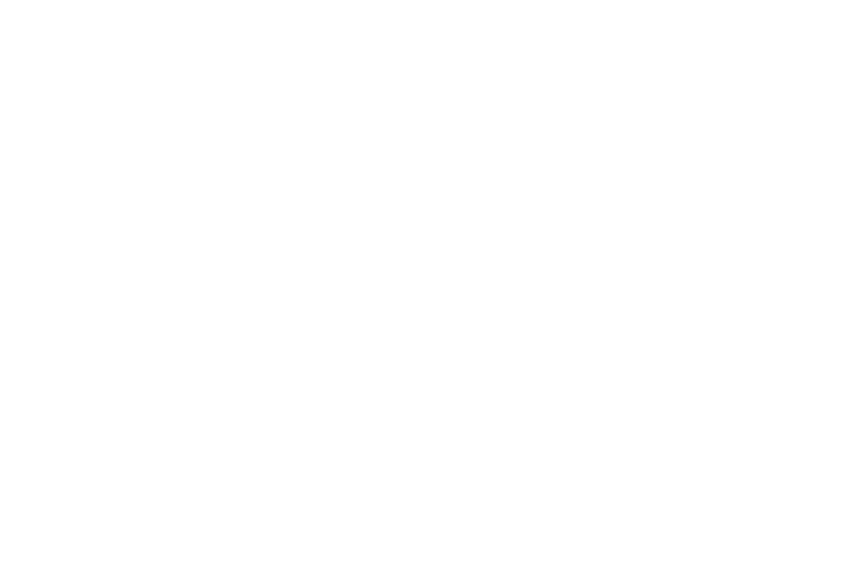

In [17]:
# now call the training function initial weight and bias will be a guess
%matplotlib notebook
# these w b and c is what you want to calculate what you are trying to calculate in the end
w, b, c = train(df_radio.Sales, df_radio.Radio, w = 0.03, b = 0.001, learning_rate = .001 , iters = 300)
print(w, b)
#plt.plot(c)
# curve should be going down therefore its a mistake if the cost is rising and not lowering

<IPython.core.display.Javascript object>


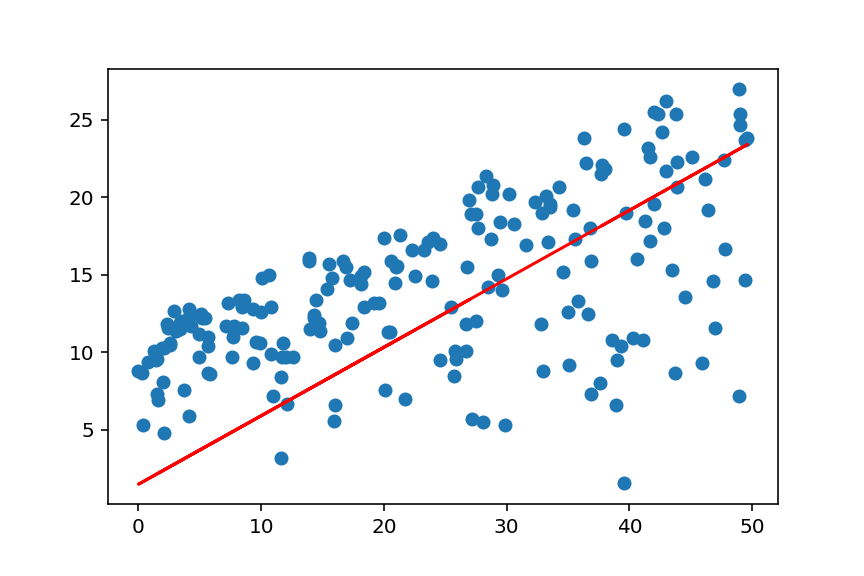

In [18]:
# learning rate has an effect on how fast you reach your weight and bias
%matplotlib notebook
plt.scatter(df_radio.Radio, df_radio.Sales)
plt.plot(df_radio, predicted_sales(df_radio,w,b), c='r')

In [74]:
#how powerful it is to write your own algorithim


In [19]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [20]:
x = df[['TV', 'Radio' , 'Newspaper']]
x.describe()

,TV,Radio,Newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


In [21]:
#now we need to do a scaling
from sklearn.preprocessing import StandardScaler

In [22]:
#to do the fitting make a fitting model
scaler = StandardScaler().fit(x)

In [23]:
x_scaled = scaler.transform(x)

In [24]:
import numpy as np
print(np.mean(x_scaled, axis = 0))
print(np.std(x_scaled, axis = 0))

[ 1.22124533e-16 -4.52970994e-16  2.22044605e-16]
[1. 1. 1.]


In [25]:
# above is the end of how we do standardization

In [27]:
#now doing the sk learn version
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_scaled, df.Sales)

In [28]:
model.coef_


array([ 3.91925365,  2.79206274, -0.02253861])

In [29]:
model.intercept_

14.0225

In [30]:
df[20:21]

,Unnamed: 0,TV,Radio,Newspaper,Sales
20,21,218.4,27.7,53.4,18.0


In [32]:
#this is takin gall the inputs from x at index 20 and then scaling it and puting it into the
# scaled prediction input. you apply the scaler transform to it to scale it 
# then what you do i sthen apply it to the model.predict within the parenthesis
# from here you will be able to see how it fares in regards to actual by indexing an output loction
scaled_prediction_input = scaler.transform(x[20:21])
pred = model.predict(scaled_prediction_input)
print('my actual was ', df.Sales.iloc[20], ' my pred is ', pred)

my actual was  18.0  my pred is  [18.10076728]


In [91]:
#shift tab in the parenthesis of a fucntion to get the help menu for any funciton in python


In [92]:
# end of the first machine learning algorythim beggining of the second

In [93]:
#logistic regression

In [3]:
# first prob regression problem second is classification problem

In [5]:
cd downloads

/Users/ricardosantos/Downloads


In [33]:
import pandas as pd
url = 'https://raw.githubusercontent.com/RicardoASantos1234/DataSets/main/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
df.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [35]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
#random state acts like seed if you dont specify test size you get by default a split of 25 75 
x = df.drop('Outcome', axis = 1)
y = df.Outcome
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .25, random_state = 12)


In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
pred_test = model.predict(x_test)
pred_test

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [39]:
model.score(x_train, y_train)

0.7743055555555556

In [40]:
model.score(x_test, y_test)

0.7864583333333334

In [41]:
#gives you an array of potential outcome to be 0 for column 1 and 1 for column 2
model.predict_proba(x_test)

array([[0.71845422, 0.28154578],
       [0.09538958, 0.90461042],
       [0.38686253, 0.61313747],
       [0.78305306, 0.21694694],
       [0.85072224, 0.14927776],
       [0.68435181, 0.31564819],
       [0.72985939, 0.27014061],
       [0.47998457, 0.52001543],
       [0.87563936, 0.12436064],
       [0.82643422, 0.17356578],
       [0.89081776, 0.10918224],
       [0.20992771, 0.79007229],
       [0.65226513, 0.34773487],
       [0.81517131, 0.18482869],
       [0.66118271, 0.33881729],
       [0.97828261, 0.02171739],
       [0.15766505, 0.84233495],
       [0.64596918, 0.35403082],
       [0.80915612, 0.19084388],
       [0.90665296, 0.09334704],
       [0.85864505, 0.14135495],
       [0.09907113, 0.90092887],
       [0.89038236, 0.10961764],
       [0.96086325, 0.03913675],
       [0.32685021, 0.67314979],
       [0.10767278, 0.89232722],
       [0.31427189, 0.68572811],
       [0.62177713, 0.37822287],
       [0.19296296, 0.80703704],
       [0.9526321 , 0.0473679 ],
       [0.

In [21]:
#first column outcome of 0 second column probability of 1 

In [42]:
model.coef_

array([[ 8.32135173e-02,  3.89687943e-02, -1.81193854e-02,
        -1.01936519e-02, -5.29304361e-05,  9.45905287e-02,
         1.06883668e+00,  9.95396649e-03]])

In [43]:
model.intercept_

array([-8.33731008])

In [44]:
results = pd.DataFrame(data= model.predict_proba(x_test))
results['pred'] = model.predict(x_test)
results['true'] = y_test.tolist()
results

,0,1,pred,true
0,0.718454,0.281546,0,0
1,0.095390,0.904610,1,1
2,0.386863,0.613137,1,1
3,0.783053,0.216947,0,0
4,0.850722,0.149278,0,0
...,...,...,...,...
187,0.955443,0.044557,0,0
188,0.205829,0.794171,1,1
189,0.809242,0.190758,0,0
190,0.870551,0.129449,0,0


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
my_scaled_model = LogisticRegression().fit(x_train_scaled, y_train)

In [46]:
my_scaled_model.score(x_train_scaled, y_train)

0.7743055555555556

In [47]:
my_scaled_model.coef_

array([[ 0.36915389,  1.1726467 , -0.26910388, -0.13281187,  0.0026367 ,
         0.76922779,  0.38435698,  0.12697787]])

<BarContainer object of 8 artists>

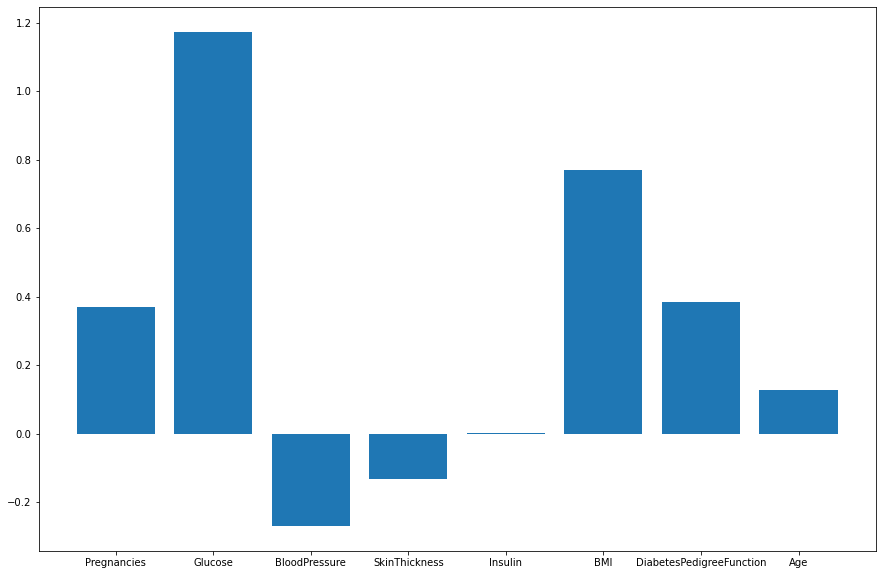

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15,10))
plt.bar(list(x.columns), my_scaled_model.coef_[0])